### We have a json file with information about Pokemon that we want to collect into a dataframe. We will use the UniqueID as the pokemon name. Begin with the following code:

`import pandas as pd`

`import requests`

`req = requests.get('https://pastebin.com/raw/r1HwmQt0')`

`pokemon_dict = req.json()`

`pokemon_dict`

#### 1) Make a list containing every Pokemon name (UniqueID). Be careful of Pokemon "MOVE"s that are also in the top level. Your list should not include UniqueIDs that begin like this:"V0013\_MOVE". Only ones that are formatted like this: "V0013\_POKEMON". Your list length should be 151.

In [86]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline
req = requests.get('https://pastebin.com/raw/r1HwmQt0')
pokemon_dict = req.json()

In [38]:
names = [p['TemplateId'] for p in pokemon_dict['Pokemon'] if 'POKEMON' in p['TemplateId']]

In [39]:
len(names), names[:5]
    

(151,
 ['V0001_POKEMON_BULBASAUR',
  'V0002_POKEMON_IVYSAUR',
  'V0003_POKEMON_VENUSAUR',
  'V0004_POKEMON_CHARMANDER',
  'V0005_POKEMON_CHARMELEON'])

#### 2) Create two new lists. One should contain only the Pokemon name itself (e.g. 'BULBASAUR') with the 'V0001\_POKEMON\_' portion of the string removed. The other should have the Pokemon ID (e.g. 'V0001') stored as a string. All three lists should be the same length.

Note: There is one pokemon with two names separated by an underscore, don't worry about getting both parts of his name



In [40]:
'V0001_POKEMON_BULBASAUR'.split('_')

['V0001', 'POKEMON', 'BULBASAUR']

In [41]:
name_actual = [s.split('_')[-1] for s in names]
len(name_actual), name_actual[:5]

(151, ['BULBASAUR', 'IVYSAUR', 'VENUSAUR', 'CHARMANDER', 'CHARMELEON'])

In [42]:
name_symbol = [s.split('_')[0] for s in names]
len(name_actual), name_symbol[:5]

(151, ['V0001', 'V0002', 'V0003', 'V0004', 'V0005'])

#### 3) Create a dataframe with the ID (e.g. 'V0001') as the index and the pokemon name (e.g. 'Bulbasaur') as the first column.

In [43]:
import pandas as pd

In [67]:
df = pd.DataFrame({'symbol':name_symbol, 'actualname': name_actual})

,actualname
symbol,
V0001,BULBASAUR
V0002,IVYSAUR
V0003,VENUSAUR
V0004,CHARMANDER
V0005,CHARMELEON


### We are going to continue working with the same Pokemon json file and extend our dataframe from yesterday. Use the same notebook that you completed that warmup in.

#### 4) Let's add the following information to the dataframe as separate columns: 'Type1', 'BaseStamina', 'BaseAttack', 'BaseDefense', 'PokedexHeightM'. Your final dataframe should have the Pokemon ID as the index and 6 columns of information, the pokemon name, along with the 5 previously listed columns. 

Note: If it is easier, you can create an entirely new dataframe instead of building on from step 3



In [62]:
Type_1 = []
BaseStamina = []
BaseAttack =[]
BaseDefense=[]
PokeHeight =[]
for p in pokemon_dict['Pokemon']:
    if 'Pokemon' in p.keys():
        Type_1.append(p['Pokemon']['Type1'])
        BaseStamina.append(p['Pokemon']['Stats']['BaseStamina'])
        BaseAttack.append(p['Pokemon']['Stats']['BaseAttack'])
        BaseDefense.append(p['Pokemon']['Stats']['BaseDefense'])
        PokeHeight.append(p['Pokemon']['PokedexHeightM'])        

In [64]:
df2 = pd.DataFrame({'Type_1': Type_1, 'BaseStamina':BaseStamina, 
                   'BaseAttack': BaseAttack, 'BaseDefense':BaseDefense,
                   'PokeHeight': PokeHeight})

In [75]:
df3 = pd.concat([df, df2], axis = 1, join_axes=[df.index])
df3.set_index('symbol', inplace = True)

In [77]:
df3.head()

,actualname,Type_1,BaseStamina,BaseAttack,BaseDefense,PokeHeight
symbol,,,,,,
V0001,BULBASAUR,POKEMON_TYPE_GRASS,90,126,126,0.7
V0002,IVYSAUR,POKEMON_TYPE_GRASS,120,156,158,1.0
V0003,VENUSAUR,POKEMON_TYPE_GRASS,160,198,200,2.0
V0004,CHARMANDER,POKEMON_TYPE_FIRE,78,128,108,0.6
V0005,CHARMELEON,POKEMON_TYPE_FIRE,116,160,140,1.1


#### 5) Find which Pokemon Type has the highest average BaseAttack



In [89]:
df3.groupby('Type_1')['BaseAttack'].mean().sort_values(ascending = False)[:1]
# Pokemon_Type_fire

Type_1
POKEMON_TYPE_FIRE    185.833333
Name: BaseAttack, dtype: float64


#### 6) Plot the top 10 Pokemon Types by highest average BaseAttack

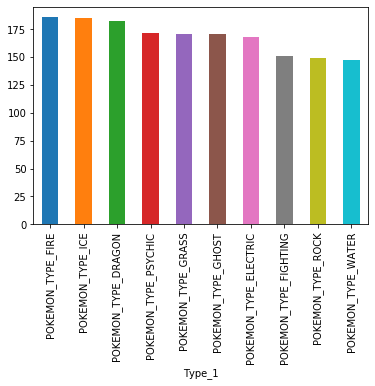

In [88]:
df3.groupby('Type_1')['BaseAttack'].mean().sort_values(ascending = False)[:10].plot.bar()